<a href="https://colab.research.google.com/github/IlyaKo4atkov/My-machine-learning-projects/blob/main/ProjectML_%E2%84%961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Модель классификации отзывов к фильмам на основе готовых данных IMDB

## Листинг кода

In [ ]:
#Импорт необходимых библиотек
import numpy as np
from keras import models
from keras import layers
from keras.datasets import imdb
import matplotlib.pyplot as plt
from keras import regularizers
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=20000)

# Получение словаря
word_index = imdb.get_word_index()
# Инвертируем словарь, меняем местами ключ и значение
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Декодируем с помощью словаря первый элемент обучающей выборки
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

#Подготовка данных
import numpy as np
def vectorize_sequences(sequences, dimension=20000):
    results = np.zeros((len(sequences), dimension)) # Создаем нулевой вектор с размерностью 20000!
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # Записываем единицы в элемент с данным индексом
    return results

x_train = vectorize_sequences(train_data) # Векторизуем обучающие данные
x_test  = vectorize_sequences(test_data)  # Векторизуем контрольные данные

#Преобразование меток к тензору типа float32
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Создаем архитектуру нейронной сети
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(20000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

#Выбор функции потерь и оптимизатора.
#Проведение обучения модели в течении 20 эпох
EPOCHS = 20
BATCH_SIZE = 256
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1)



17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - accuracy: 0.6547 - loss: 0.7017 - val_accuracy: 0.8828 - val_loss: 0.3689
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.8940 - loss: 0.3742 - val_accuracy: 0.8968 - val_loss: 0.3274
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9292 - loss: 0.2713 - val_accuracy: 0.8948 - val_loss: 0.3511
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.9428 - loss: 0.2120 - val_accuracy: 0.8940 - val_loss: 0.3507
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.9571 - loss: 0.1703 - val_accuracy: 0.8900 - val_loss: 0.3752
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.9620 - loss: 0.1544 - val_accuracy: 0.8960 - val_loss: 0.4183
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9690 - loss: 0.1293 - val_accuracy: 0.8920 - val_loss: 0.4375
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.9763 - loss: 0.1096 - val_accuracy: 0.8880

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8761 - loss: 0.6004
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9989 - loss: 0.0227
Точность на контрольной выбопке: 87.7%
Точность на валидационной выборке: 98.8%


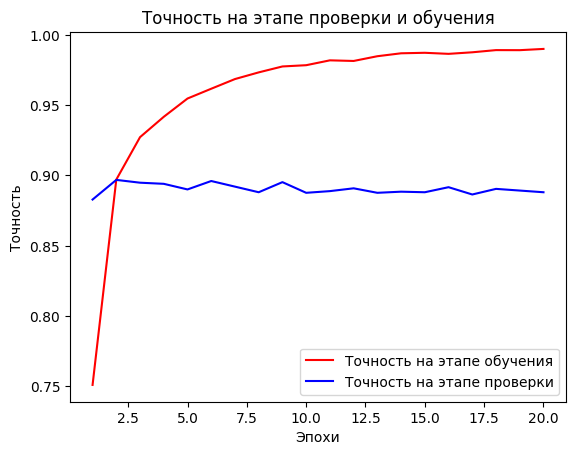

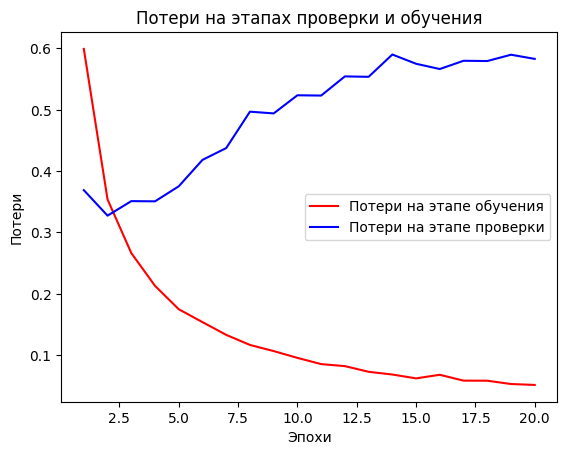

In [ ]:
# Оценка модели на контрольной и валидационной  выборке
test_loss, test_acc = model.evaluate(x_test, y_test)
train_loss, train_acc = model.evaluate(x_train, y_train)
print(f'Точность на контрольной выбопке: {(test_acc * 100):.1f}%')
print(f'Точность на валидационной выборке: {(train_acc * 100):.1f}%')


# Визуализация результатов
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, EPOCHS + 1)

plt.plot(epochs, acc, 'r', label='Точность на этапе обучения')
plt.plot(epochs, val_acc, 'b', label='Точность на этапе проверки')
plt.title('Точность на этапе проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Потери на этапе обучения')
plt.plot(epochs, val_loss, 'b', label='Потери на этапе проверки')
plt.title('Потери на этапах проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.show()